In [1]:
import importlib

import ogip.spec
import ogip.tools
import matplotlib.pylab as plt

In [28]:
import test_spectrum_jemx_science as t
importlib.reload(t)

datas = t.test_source("production")

DEBUG:oda_api.custom_formatters: NO custom formatter for instrument mock 
DEBUG:oda_api.token:searching for token in environment variable ODA_TOKEN
INFO:oda_api.token:decoding token with jwt and NOT verifying
INFO:oda_api.token:found token in environment variable ODA_TOKEN your token payload: {
    "email": "Volodymyr.Savchenko@unige.ch",
    "exp": 1634486483.5381484,
    "msdone": false,
    "mssub": false,
    "name": "sitamin",
    "roles": "authenticated user, administrator, content manager, general, integral-private-qla, magic, unige-hpc-full, public-pool-hpc, antares",
    "sub": "Volodymyr.Savchenko@unige.ch"
}
INFO:oda_api.token:token expires in 220.9 h
DEBUG:oda_api.token:discovered token method environment variable ODA_TOKEN
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443


running test spectrum at  production
[ DispatcherAPI: https://www.astro.unige.ch/mmoda/dispatch-data ]


DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "GET /mmoda/dispatch-data/api/par-names?instrument=jemx&product_type=jemx_spectrum HTTP/1.1" 200 163
DEBUG:oda_api.api:dig_list unable to literal_eval src_name; problem malformed node or string: <ast.Name object at 0x7fb59b426310>
DEBUG:oda_api.api:dig_list unable to literal_eval RA; problem malformed node or string: <ast.Name object at 0x7fb5a009d340>
DEBUG:oda_api.api:dig_list unable to literal_eval DEC; problem malformed node or string: <ast.Name object at 0x7fb5a009d9a0>
DEBUG:oda_api.api:dig_list unable to literal_eval T1; problem malformed node or string: <ast.Name object at 0x7fb5a00dcd30>
DEBUG:oda_api.api:dig_list unable to literal_eval T2; problem malformed node or string: <ast.Name object at 0x7fb5a00dc6d0>
DEBUG:oda_api.api:dig_list unable to literal_eval token; problem malformed node or string: <ast.Name object at 0x7fb5a00dc880>
DEBUG:oda_api.api:dig_list unable to literal_eval scw_list; problem malformed node or

DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2644 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2644, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2644 > 1000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8978
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: fc80e858f85fcb71
 / the job is working remotely, please wait status=submitted job_id=fc80e858 in 1 messages since 72 seconds (11/12); in 0 SCW so far; nodes (1): 0 computed 1 restored
... spe_pick : restored from cache : inapplicable
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:06:24), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2644, max for GET is 1000
DEBUG:oda_a

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8976
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: fc80e858f85fcb71
 / the job is working remotely, please wait status=submitted job_id=fc80e858 in 1 messages since 174 seconds (12/12); in 0 SCW so far; nodes (1): 0 computed 1 restored
... spe_pick : restored from cache : inapplicable
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:08:06), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2644, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2644 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2644, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2644 > 1000
DEBUG:urll

DEBUG:oda_api.api:dig_list unable to literal_eval integral_data_rights; problem malformed node or string: <ast.Name object at 0x7fb59a800fa0>
DEBUG:oda_api.api:dig_list unable to literal_eval jemx_num; problem malformed node or string: <ast.Name object at 0x7fb59a800f70>
DEBUG:oda_api.api:dig_list unable to literal_eval E1_keV; problem malformed node or string: <ast.Name object at 0x7fb59a800a30>
DEBUG:oda_api.api:dig_list unable to literal_eval E2_keV; problem malformed node or string: <ast.Name object at 0x7fb59a800dc0>
DEBUG:oda_api.api.dispatcherapi:['037700020010.001', '037700070010.001', '037700080010.001', '037700090010.001', '037700100010.001', '037700110010.001', '037700120010.001', '037700170010.001', '037700180010.001', '037700190010.001', '037700200010.001', '037700210010.001', '037700220010.001', '037700230010.001', '037700270010.001', '037700280010.001', '037700290010.001', '037700300010.001', '037700310010.001', '037700320010.001', '037700380010.001', '037700390010.001',

INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:10:44), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8705
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: 6728e65e6c368872
 - the job is working remotely, please wait status=submitted job_id=6728e65e in 1 messages since 112 seconds (11/18); in 0 SCW so far; nodes (1): 0 computed 0 restored
... spe_pick : done loading modules : none
INFO:oda_api.api.

DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8705
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: 6728e65e6c368872
 - the job is working remotely, please wait status=submitted job_id=6728e65e in 1 messages since 226 seconds (12/18); in 0 SCW so far; nodes (1): 0 computed 0 restored
... spe_pick : done loading modules : none
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:12:53), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8706
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: 6728e65e6c368872
 - the job is working remotely, please wait status=submitted job_id=6728e65e in 1 messages since 340 seconds (12/18); in 0 SCW so far; nodes (1): 0 computed 0 restored
... spe_pick : done loading modules : none
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:14:47), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:urllib3.con

 - the job is working remotely, please wait status=submitted job_id=6728e65e in 1 messages since 454 seconds (12/18); in 0 SCW so far; nodes (1): 0 computed 0 restored
... spe_pick : done loading modules : none
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:16:41), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8706
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: 6728e65e6c368872
 \ the job is wor

DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8706
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: 6728e65e6c368872
 \ the job is working remotely, please wait status=submitted job_id=6728e65e in 1 messages since 581 seconds (12/18); in 0 SCW so far; nodes (1): 0 computed 0 restored
... spe_pick : done loading modules : none
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:18:48), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api

DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "POST /mmoda/dispatch-data/run_analysis HTTP/1.1" 200 8705
INFO:oda_api.api:session: LBOGLLLJ2D81ROF2 job: 6728e65e6c368872
 \ the job is working remotely, please wait status=submitted job_id=6728e65e in 1 messages since 696 seconds (13/18); in 0 SCW so far; nodes (1): 0 computed 0 restored
... spe_pick : done loading modules : none
INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2021-10-08 13:20:43), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api.dispatcherapi:switching to POST request due to large payload: 2649 > 1000
DEBUG:oda_api.api.dispatcherapi:payload size 2649, max for GET is 1000
DEBUG:oda_api.api

{'public': <oda_api.api.DataCollection object at 0x7fb5a0599370>, 'all-private': <oda_api.api.DataCollection object at 0x7fb5a01f7640>}


In [29]:
def steperr(x, y, dy, **kwargs):
    _ = plt.errorbar(
        x,
        y,
        dy,
        ls="",
        **kwargs
    )

    plt.step(
        x,
        y,
        where="mid",
        c=_[0].get_color(),
        **kwargs
    )

In [30]:
import astropy.io.fits as fits

rpu = fits.open('rmf_public.fits')
rpr = fits.open('rmf_all-private.fits')

#it would help N_GRP, F_CHAN, N_CHAN to 1,1, 32 

rpu[2].data

FITS_rec([( 1.99213004,   2.00786996, 1, [   1], [   2], [5.29994769e-03, 2.49997538e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
          ( 2.00786996,   2.02367496, 1, [   1], [   2], [6.09993841e-03, 2.49997509e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
          ( 2.02367496,   2.03960514, 1, [   1], [   2], [5.44994557e-03, 1.49998523e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
          ( 2.03960514,   2.055655  , 1, [   1], [  

DEBUG:root:failed to read from <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb5a0118c40>: "Keyword 'EXPOSURE' not found."
DEBUG:root:failed to read with RMF.from_file_name_osaisgri <staticmethod object at 0x7fb5b1fe8b50>: "Extension 'ISGR-RMF.-RSP' not found."
DEBUG:root:failed to read with RMF.from_file_name_normal <staticmethod object at 0x7fb5b1fe8b80>: "Extension 'MATRIX' not found."
DEBUG:root:failed to read from <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb5a0190490>: "Keyword 'EXPOSURE' not found."
DEBUG:root:failed to read with RMF.from_file_name_osaisgri <staticmethod object at 0x7fb5b1fe8b50>: "Extension 'ISGR-RMF.-RSP' not found."
DEBUG:root:failed to read with RMF.from_file_name_normal <staticmethod object at 0x7fb5b1fe8b80>: "Extension 'MATRIX' not found."


[]

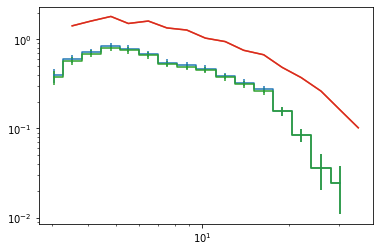

In [31]:
plt.figure()

S = {}

for k, data in datas.items():
    data.as_list()
    data.jemx_spectrum_0_VelaXm1_jemx_spectrum.write_fits_file(f'spec_{k}.fits')
    data.jemx_spectrum_1_VelaXm1_jemx_arf.write_fits_file(f'arf_{k}.fits')
    data.jemx_spectrum_2_VelaXm1_jemx_rmf.write_fits_file(f'rmf_{k}.fits')
    
    S[k] = dict(
        pha = ogip.spec.PHAI.from_file_name(f'spec_{k}.fits'),
        arf = ogip.spec.ARF.from_file_name(f'arf_{k}.fits'),
        rmf = ogip.spec.RMF.from_file_name(f'rmf_{k}.fits')
    )

    e1 = S[k]['rmf']._e_min
    e2 = S[k]['rmf']._e_max
    de = e2 - e1
    
    x = steperr(
        S[k]['rmf']._e_min,
        S[k]['pha']._rate/de,
        S[k]['pha']._stat_err/de,
    )

    model = ogip.tools.convolve(
        lambda en:(en/10)**-2 * 1e-2,
        S[k]['rmf'],
        S[k]['arf'],
    )

    plt.plot(
        e2,
        model,
    )

plt.loglog()

In [32]:
!ls -lort

total 740
-rw-rw-r-- 1 savchenk    906 Apr 26 16:58 test_gw.py
-rw-rw-r-- 1 savchenk     61 Apr 26 16:58 test_example.py
-rw-rw-r-- 1 savchenk    619 Mai 21 09:52 run.py
-rw-rw-r-- 1 savchenk     74 Jun 21 16:08 requirements.txt
-rw-rw-r-- 1 savchenk  14400 Okt  8 09:06 spec.fits
-rw-rw-r-- 1 savchenk  17280 Okt  8 09:06 arf.fits
-rw-rw-r-- 1 savchenk 109440 Okt  8 09:06 rmf.fits
-rw-rw-r-- 1 savchenk   5495 Okt  8 09:33 test_image.py
-rw-rw-r-- 1 savchenk    782 Okt  8 09:33 odaplatform.py
-rw-rw-r-- 1 savchenk   4599 Okt  8 09:33 test_spectrum.py
-rw-rw-r-- 1 savchenk   1686 Okt  8 09:33 test_magic.py
-rw-rw-r-- 1 savchenk   2967 Okt  8 09:33 test_lcr.py
-rw-rw-r-- 1 savchenk   2750 Okt  8 09:33 test_lc.py
-rw-rw-r-- 1 savchenk   1215 Okt  8 09:33 test_instruments.py
-rw-rw-r-- 1 savchenk   4196 Okt  8 09:50 test_spectrum_jemx_science.py
drwxrwxr-x 2 savchenk   4096 Okt  8 09:50 __pycache__
-rw-rw-r-- 1 savchenk 272429 Okt  8 13:22 testjemx.ipynb
-rw-rw-r-- 1 savchenk  14400 Okt  8 1